In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#import os
#if not os.path.exists('fig'):
#    os.makedirs('fig')

In [3]:
# some of the handbook code raises (many) warnings
# fix w/ https://docs.python.org/2/library/warnings.html#temporarily-suppressing-warnings
import warnings

In [4]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

# Classification example figures

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

In [6]:
# create 50 'separable points'
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [7]:
# fit SVM classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

In [9]:
# predict the labels
y2 = clf.predict(X2)
y2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1])

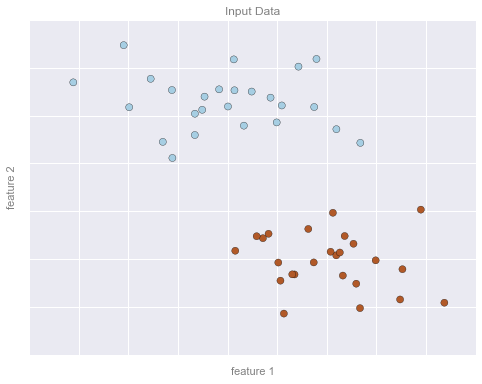

In [10]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')

In [11]:
# get contours describing the model
# this looks like the lines showing the support vectors
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    Z = np.array([clf.decision_function(t)
                  for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

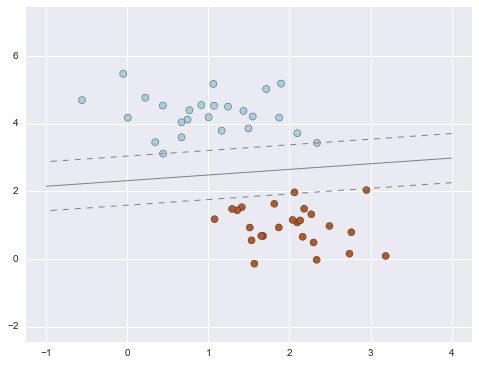

In [13]:
# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels=[-1.0, 0.0, 1.0],
                  linestyles=['dashed','solid','dashed'],
                  colors='gray', linewidths=1)
ax.scatter(X[:,0], X[:,1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

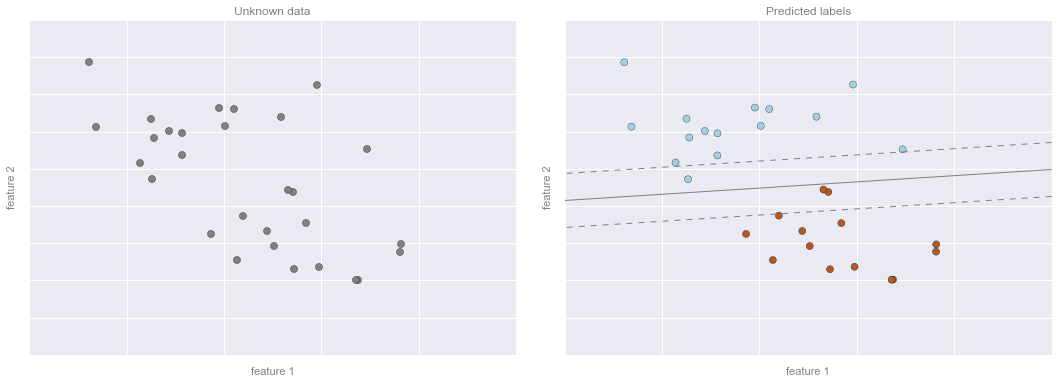

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:,0], X2[:,1], c='gray', **point_style)
ax[0].axis([-1,4,-2,7])

ax[1].scatter(X2[:,0], X2[:,1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1,4,-2,7])

format_plot(ax[0], 'Unknown data')
format_plot(ax[1], 'Predicted labels')

# Regression example figures

In [15]:
from sklearn.linear_model import LinearRegression

In [20]:
# create random data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200,2)
y = np.dot(X, [2, 1]) + 0.1 * rng.randn(X.shape[0])

In [21]:
# fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# create new points to predict
X2 = rng.randn(100, 2)

# and predict the labels
y2 = model.predict(X2)

[-4, 4, -3, 3]

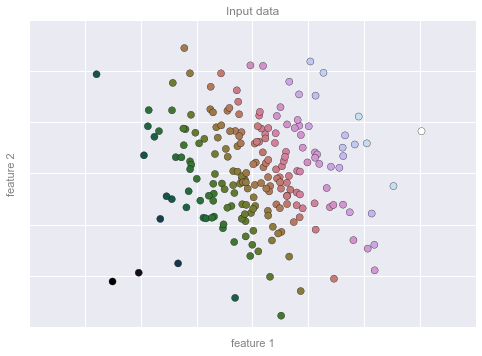

In [23]:
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cubehelix')

format_plot(ax, 'Input data')
ax.axis([-4, 4, -3, 3])

In [24]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [25]:
points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

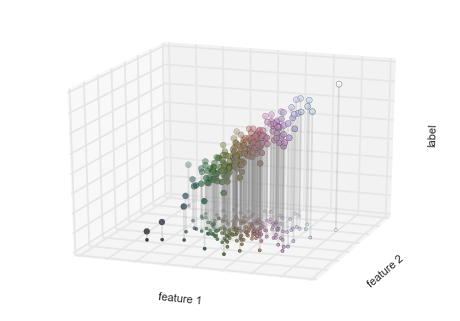

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35, cmap='cubehelix')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10, cmap='cubehelix')

ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# hide axis - author asks if there's a better way
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

[-4, 4, -3, 3]

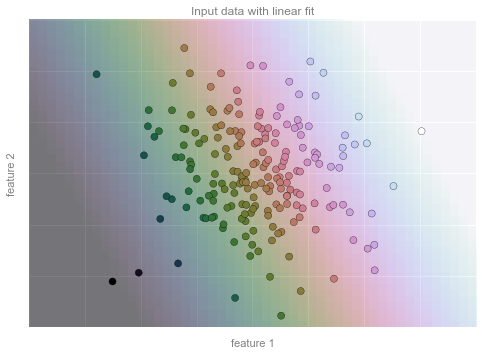

In [29]:
# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cubehelix', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5, cmap='cubehelix',
              norm=pts.norm, zorder=1)

format_plot(ax, 'Input data with linear fit')
ax.axis([-4, 4, -3, 3])

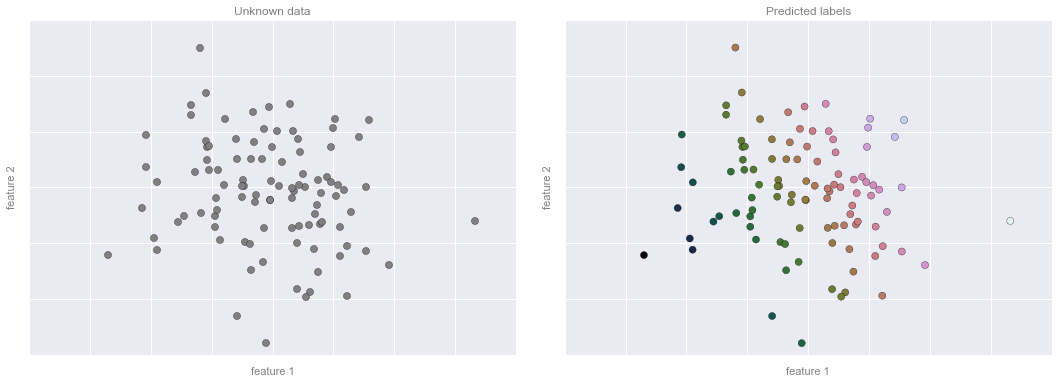

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='cubehelix', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

format_plot(ax[0], 'Unknown data')
format_plot(ax[1], 'Predicted labels')

# Clustering example figures

In [31]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [32]:
# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# fit the model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

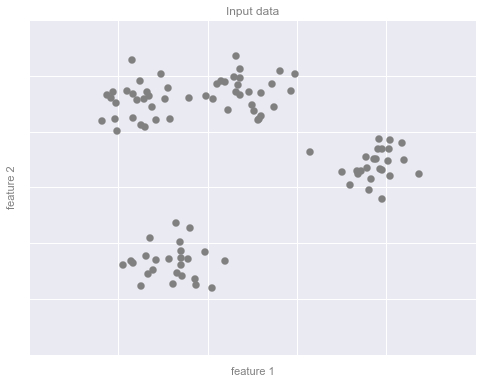

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

format_plot(ax, 'Input data')

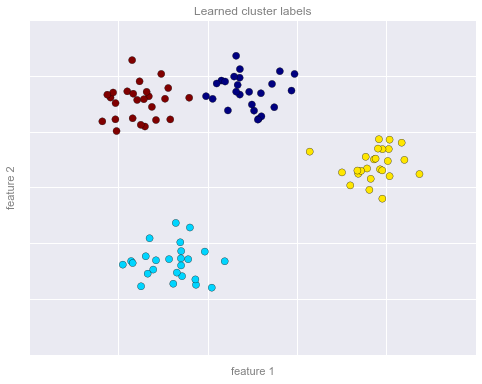

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='jet')

format_plot(ax, 'Learned cluster labels')

# Dimensionality reduction

In [36]:
from sklearn.datasets import make_swiss_roll

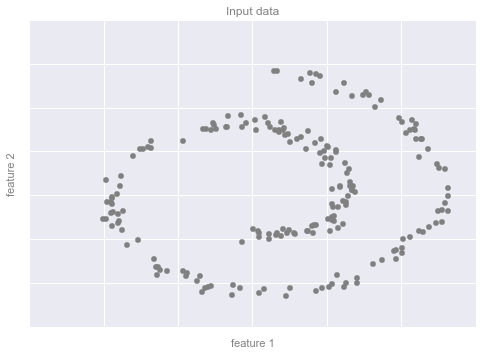

In [37]:
# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

format_plot(ax, 'Input data')

In [40]:
from sklearn.manifold import Isomap

In [41]:
model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

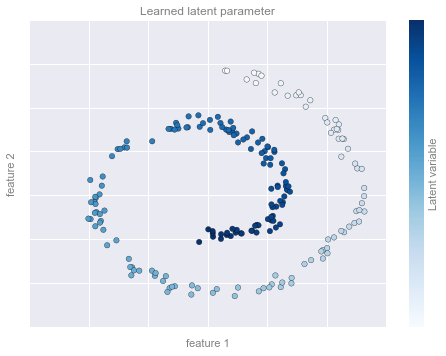

In [42]:
# visualize
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='Blues', s=30)
cb = fig.colorbar(pts, ax=ax)

format_plot(ax, 'Learned latent parameter')
cb.set_ticks([])
cb.set_label('Latent variable', color='gray')

# Introducing Scikit-Learn

In [46]:
import seaborn as sns; sns.set()

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [44]:
iris = sns.load_dataset('iris')
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


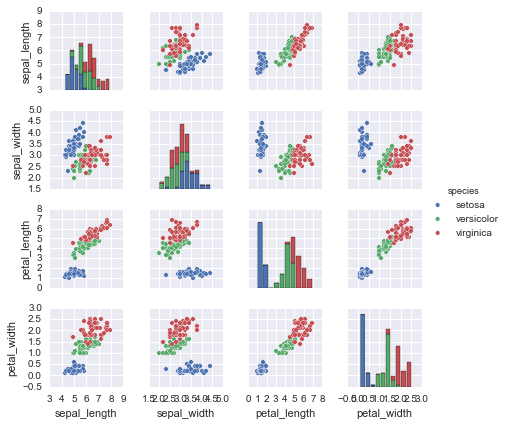

In [47]:
sns.pairplot(iris, hue='species', size=1.5)

In [50]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [51]:
y_iris = iris['species']
y_iris.shape

(150,)

## Simple linear regression

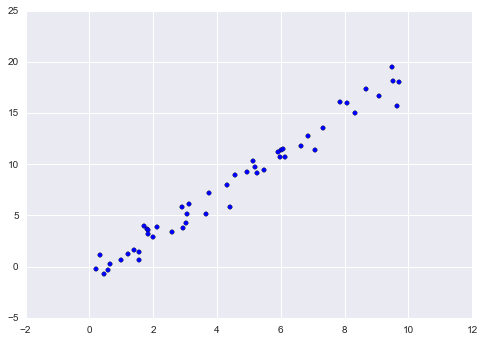

In [53]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [54]:
rng.rand?

In [55]:
x

array([ 3.74540119,  9.50714306,  7.31993942,  5.98658484,  1.5601864 ,
        1.5599452 ,  0.58083612,  8.66176146,  6.01115012,  7.08072578,
        0.20584494,  9.69909852,  8.32442641,  2.12339111,  1.81824967,
        1.8340451 ,  3.04242243,  5.24756432,  4.31945019,  2.9122914 ,
        6.11852895,  1.39493861,  2.92144649,  3.66361843,  4.56069984,
        7.85175961,  1.99673782,  5.14234438,  5.92414569,  0.46450413,
        6.07544852,  1.70524124,  0.65051593,  9.48885537,  9.65632033,
        8.08397348,  3.04613769,  0.97672114,  6.84233027,  4.40152494,
        1.22038235,  4.9517691 ,  0.34388521,  9.09320402,  2.58779982,
        6.62522284,  3.11711076,  5.20068021,  5.46710279,  1.84854456])

In [56]:
from sklearn.linear_model import LinearRegression

In [59]:
# instantiate model w/ hyperparams, don't apply to data yet
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# y is already in a 1D array w/ length n_samples so no need for processing
# x needs to be size [n_samples, n_features]
x.shape # it's not, yet

(50,)

In [62]:
X = x[:, np.newaxis]
X.shape # now it is

(50, 1)

In [65]:
x[:3]

array([ 3.74540119,  9.50714306,  7.31993942])

In [67]:
X[:3]

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942]])

In [68]:
# fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Note that fitting the model doesn't return anything - instead it modifies attributes that are part of the instantiated model instance. By convention, all of the attributes that are a result of learning/fitting havea  trailing underscore.

(Using the model for prediction, in comparison, appears to return the results.)

In [71]:
model.coef_  # slope

array([ 1.9776566])

In [72]:
model.intercept_  # y-intercept

-0.90331072553111635

Nicely put description of what the sklearn stuff does and doesn't, and comparison to statistical modeling:

"One question that frequently comes up regards the uncertainty in such internal model parameters. In general, scikit-learn does not provide tools to draw conclusions from internal model parameters themselves: this is much more a statistical modeling question than a machine learning question. Recall from Section X.X that we differentiated between statistical modeling, which generally asks what the models and their parameters mean, and machine learning, which generally asks what the models and their parameters predict. If you want to understand what the model parameters mean, machine learning is not really the appropriate set of tools: instead, I would recommend a Bayesian modeling approach to your problem (see Section X.X)."

In [76]:
# now predict using the model
xfit = np.linspace(-1, 11) # start, stop - defaults to 50 values
xfit.shape

(50,)

In [78]:
# need the same format as X: [n_samples, n_features]
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [80]:
# and then we can fit
yfit = model.predict(Xfit)
yfit.shape

(50,)

In [81]:
yfit[:3]

array([-2.88096733, -2.39664326, -1.9123192 ])

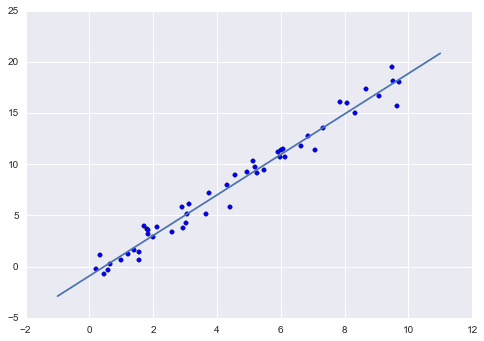

In [82]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised learning example: iris classification

Start with Gaussian Naive Bayes because it's fast and simple (no hyperparameters). This gives you a baseline and you can try other more complicated learners to see if they're better.

In [85]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [87]:
# instantiate, train, and predict
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [88]:
# how well did it do?
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

## Unsupervised learning example: iris dimensionality

The iris data is four-dimensional. Can we reduce the dimensionality so we can visualize it more easily? Put differently, can we find a suitable lower-dimensional representation that retains the essential features of the data? If so, we can visualize using that lower dimensional representation - plotting 2D data is easier than 3D+.

We'll try PCA. It's linear, and we'll see if that works well.

Note that the pattern of four items - choose model, instantiate model, fit to data, and then use the model - is the same, even though we're doing unsupervised learning now. The differences are that we don't provide a set of y data in the fit method, and we use - for example - transform instead of predict in the last step.

In [90]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


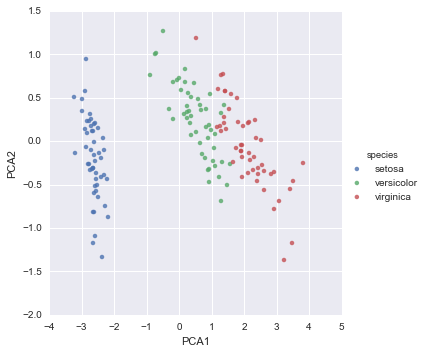

In [91]:
# plot - simple approach is to insert the results into the original dataframe
# and then plot those values
iris['PCA1'], iris['PCA2'] = X_2D.T
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', fit_reg=False)

This shows that - even though the PCA algorithm knew nothing about the actual labels - it was able to separate the species relatively well.

## Unsupervised learning: iris clustering

Gaussian Mixture Models (GMMs) attempt to model the data as a collection of 'Gaussian blobs'.

In [92]:
from sklearn.mixture import GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris) # here we use predict to get the labels for the clusters

In [93]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [94]:
iris['cluster'] = y_gmm

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


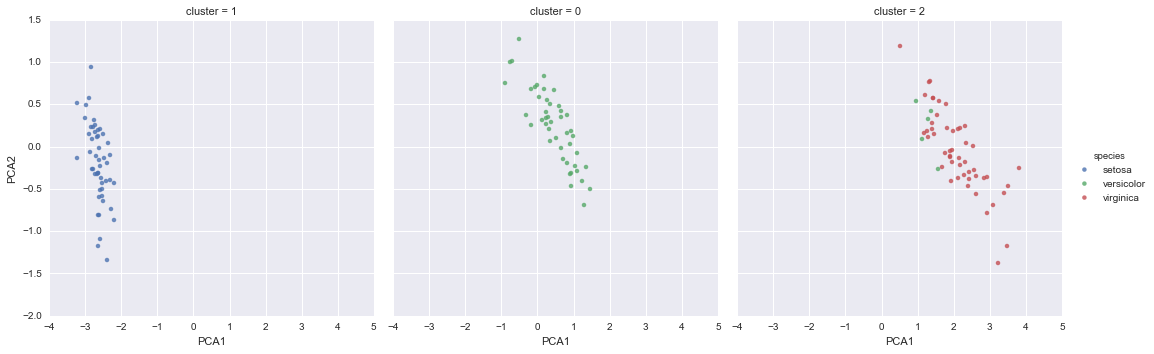

In [95]:
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

"By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly, while there remains a small amount of mixing between versicolor and virginica. What this tells us is that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing."

Note that the plots above use the three actual names, but only after the fact, so we can visually see how well the clustering algorithm has distinguished between the different species. That is, the clustering algorithm is what has decided which points go into each of the three plots, and it's done this clustering without any knowledge of the actual species values. 

# Application: exploring hand-written digits

TBD